# Decision Trees and Random Forests ML models 
> Chapter 8 of Statistical learning 
> Tree Methods 
  - Example of weather based features to decide whether my friend came to play 
  - Done with the help of Decision tree
  - Nodes (Outlook , humidity , windy) features that can be splitted 
  - Edges outcome of a split to the next node 
  - Root - node that perform the first split 
  - Leaves - terminal nodes that predict the outcome 
> Intuiton behind splits - based on the column that splits the data equally into 2 classes for ex: x,y,z 
  y splits equally into 2 classes namely A and B
> Entropy gain and Information gain are methods choosing the split 

  

> Random forests 
  - Decision trees dont have the best predictive accuracy due to high variance 
  - Bagging (Random forests) reduces the variance 
  - A new random sample of features is chosen for every single tree at every split 
  - m is the sq.rt of p 
  
> why Random forests ?
  - one very strong feature in the data set. when using bagged (bootstrapped) trees most of the trees  
    will use that feature as top split resulting in a ensemble of similar trees that are highly
    correlated
  - Averaging highly correlated quantities does not significantly reduce variance 
  - By randomly leaving out candidate features(strong feature) from each split , Random forest 
    decorrelates the trees such that the averaging process can reduce the variance of the resulting
    model  
> Most powerful classifier - start with this for all problemsets 

In [3]:
# imports 

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

# dataset 
df = pd.read_csv('kyphosis.csv')
df.head()
# Number - number of vertebrae involved  Start - num of first or topmost vertbrae that was operated 


,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


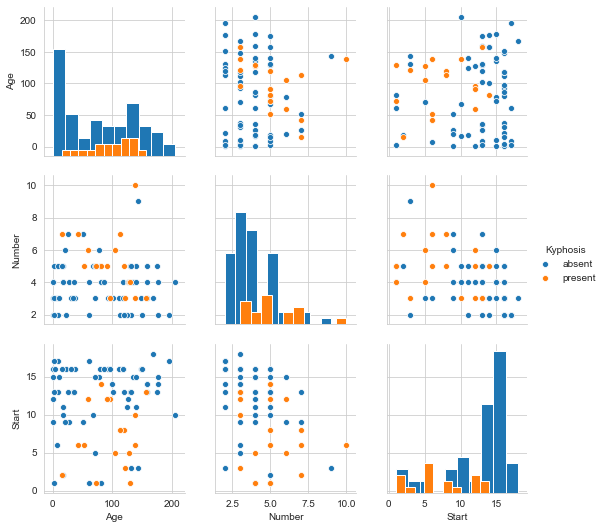

In [20]:
# Explore the data 
sns.set_style('whitegrid')
sns.pairplot(data=df, hue='Kyphosis',diag_kind='hist',diag_kws=dict(histtype='barstacked', stacked=True),
            )

In [24]:
# Drop kyphosis for X and assign it to y
X = df.drop(labels='Kyphosis',axis=1)
y = df['Kyphosis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [25]:
# tree
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtree = DecisionTreeClassifier()

In [27]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
predictions = dtree.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix


In [31]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[19  0]
 [ 5  1]]


              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



In [37]:
# Random forest 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)

In [38]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
rfc_prediction= rfc.predict(X_test)

In [40]:
print(confusion_matrix(y_test,rfc_prediction))
print('\n')
print(classification_report(y_test,rfc_prediction))

[[19  0]
 [ 5  1]]


              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



In [ ]:
# install graphviz and pydot 
